In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/home/darnesh/Documents/sample data/home_price_gd_sgd.csv")
data

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00
5,1170,2,38.00
6,2732,4,135.00
7,3300,4,155.00
8,1310,3,50.00
9,3700,5,167.00


In [3]:
data.sample(5)

,area,bedrooms,price
18,2770,3,102.0
14,2250,3,101.0
3,1521,3,75.0
6,2732,4,135.0
11,2785,4,140.0


In [4]:
data.drop('price',axis=1).sample(3)

,area,bedrooms
11,2785,4
8,1310,3
5,1170,2


In [5]:
type(data[['price']])
type(data.price.values)
data.price.values.shape
data.shape
type(data.price.values)
type(data[['price']])
data.price.values.reshape(-1,1).shape

(20, 1)

In [6]:
from sklearn.preprocessing import MinMaxScaler
sx = MinMaxScaler()
sy = MinMaxScaler()

scaled_x = sx.fit_transform(data.drop('price',axis=1))
scaled_y = sy.fit_transform(data.price.values.reshape(-1,1))   #can use data[['price']] insted

scaled_x.shape
scaled_y.shape

(20, 1)

In [7]:
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [8]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

reshape scaled target to 1D array from 2D array

In [9]:
scaled_y = scaled_y.reshape(20,)
scaled_y

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [10]:
scaled_y.shape

(20,)

In [11]:
scaled_x.T

array([[0.08827586, 0.62068966, 0.22068966, 0.24862069, 0.13793103,
        0.12758621, 0.6662069 , 0.86206897, 0.17586207, 1.        ,
        0.34482759, 0.68448276, 0.06896552, 0.10344828, 0.5       ,
        0.12931034, 0.13103448, 0.25517241, 0.67931034, 0.        ],
       [0.25      , 0.75      , 0.5       , 0.5       , 0.25      ,
        0.25      , 0.75      , 0.75      , 0.5       , 1.        ,
        0.5       , 0.75      , 0.25      , 0.25      , 0.5       ,
        0.25      , 0.5       , 0.5       , 0.5       , 0.        ]])

In [12]:
scaled_x.T.shape

(2, 20)

In [13]:
s = np.ones(shape=scaled_x.shape[1])
print(s)
np.dot(s,scaled_x.T)

[1. 1.]


array([0.33827586, 1.37068966, 0.72068966, 0.74862069, 0.38793103,
       0.37758621, 1.4162069 , 1.61206897, 0.67586207, 2.        ,
       0.84482759, 1.43448276, 0.31896552, 0.35344828, 1.        ,
       0.37931034, 0.63103448, 0.75517241, 1.17931034, 0.        ])

In [14]:
a = np.array([1,2])
b = np.array([[1,2],[3,4],[4,5]])
print(a,'\n',b)
print(a*b)
print(sum(a*b))
np.dot(a,b.T)

[1 2] 
 [[1 2]
 [3 4]
 [4 5]]
[[ 1  4]
 [ 3  8]
 [ 4 10]]
[ 8 22]


array([ 5, 11, 14])

In [15]:
a = np.array([1,2,3,5])
b = 3
print(b*a)

[ 3  6  9 15]


In [177]:
def batch_gd(x,y_true,epochs,learning_rate):
    w = np.ones(shape=x.shape[1])  #initial weights = 1 for w1 and w2
    b = 0   #bias
    total_samples = x.shape[0]
    cost_list = []
    epochs_list = []
    w_list = []
    b_list = []

    for i in range(epochs):
        y_pred = w.dot(x.T)+b

        '''print("w.dot(x.T)",w.dot(x.T))
        print("y_pred",y_pred)
        print(x.T)
        print(y_true-y_pred)
        print(np.dot(x.T,(y_true-y_pred)))'''

        #print("y_pred  ",y_pred)

        w_grad = (-2/total_samples)*(np.dot(x.T,(y_true-y_pred)))
        b_grad = (-2/total_samples)*np.sum(y_true-y_pred)

        '''print(f"w_grad : {w_grad}")
        print(f"b_grad : {b_grad}")'''

        w = w - learning_rate*w_grad
        b = b - learning_rate*b_grad

        '''print(f"w : {w}")
        print(f"b : {b}")'''

        cost = np.mean(np.square(y_true-y_pred))

        #print("cost  ",cost)

        if i%10==0:
            cost_list.append(cost)
            epochs_list.append(i)
            w_list.append(w)
            b_list.append(b)

    return w,b,cost_list,epochs_list,cost,w_list,b_list

In [62]:
a = np.array([[1,2,3],[4,5,6]])
b = np.array([1,2,3])
a.dot(b)

array([14, 32])

In [59]:
a = np.array([1,2,3])
b = np.array([[1,2,3],[4,5,6]])
a.dot(b.T)

array([14, 32])

In [178]:
w,b,cost_list,epochs_list,cost,w_list,b_list = batch_gd(scaled_x,scaled_y,500,0.01)
w,b,cost


(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

In [121]:
type(w_list)

list

In [112]:
w_list

[array([0.99551317, 0.99445655]),
 array([0.95630831, 0.94626642]),
 array([0.92561534, 0.90895369]),
 array([0.9013738 , 0.87987065]),
 array([0.88202714, 0.8570175 ]),
 array([0.86639945, 0.8388837 ]),
 array([0.85360224, 0.82432823]),
 array([0.8429641 , 0.81248913]),
 array([0.83397757, 0.80271516]),
 array([0.826259  , 0.79451428]),
 array([0.81951826, 0.78751463]),
 array([0.81353584, 0.78143512]),
 array([0.80814559, 0.77606324]),
 array([0.80322164, 0.77123825]),
 array([0.79866856, 0.76683852]),
 array([0.79441393, 0.76277198]),
 array([0.79040267, 0.75896884]),
 array([0.78659287, 0.75537619]),
 array([0.78295249, 0.75195384]),
 array([0.77945703, 0.74867123]),
 array([0.77608763, 0.74550508]),
 array([0.77282973, 0.74243756]),
 array([0.76967201, 0.73945505]),
 array([0.76660562, 0.73654702]),
 array([0.76362356, 0.73370536]),
 array([0.76072023, 0.73092372]),
 array([0.75789113, 0.72819713]),
 array([0.75513254, 0.72552166]),
 array([0.7524414 , 0.72289414]),
 array([0.7498

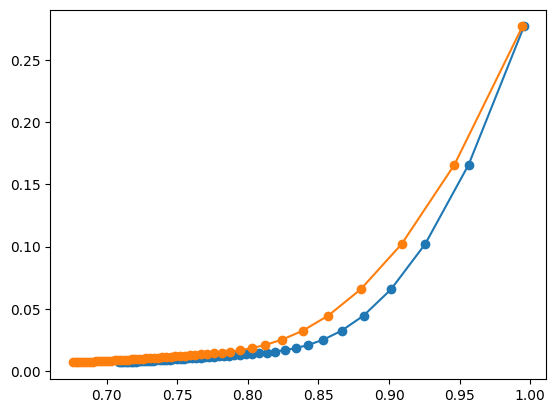

In [18]:
plt.plot(w_list,cost_list,marker='o')

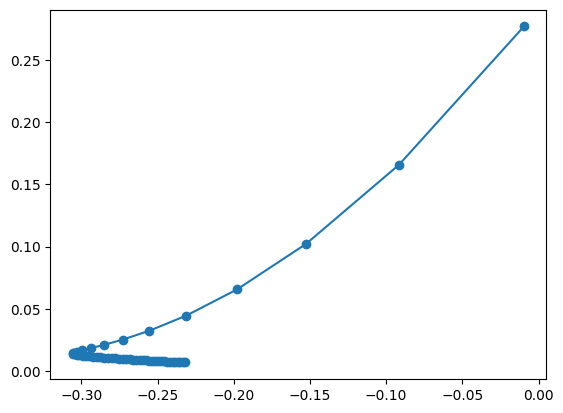

In [19]:
plt.plot(b_list,cost_list,marker='o')

Text(0, 0.5, 'cost')

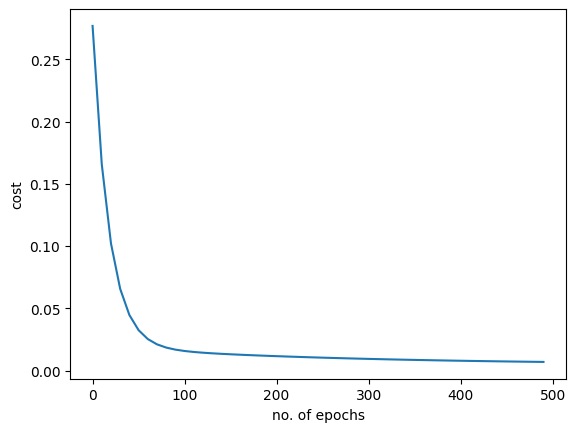

In [20]:
plt.plot(epochs_list,cost_list)
plt.xlabel('no. of epochs'); plt.ylabel('cost')

In [21]:
sx.transform([[2400,3]])

/home/darnesh/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.55172414, 0.5       ]])

In [22]:
sy.inverse_transform([[300]])

array([[40532.]])

In [179]:
def predict(area,bedrooms,w,b):
    scaled_x = sx.transform([[area,bedrooms]])[0]
    scaled_price = w[0]*scaled_x[0] + w[1]*scaled_x[1] + b
    return sy.inverse_transform([[scaled_price]])[0][0]

In [24]:
predict(2600,4,w,b)

/home/darnesh/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [180]:
predict(800,1,w,b)

/home/darnesh/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


0.9029424581499743

In [27]:
import random
random.randint(0,9)

7

In [30]:
random.randrange(3,5)

3

In [35]:
scaled_x.shape

(20, 2)

In [36]:
scaled_y.shape

(20,)

In [45]:
print(np.ones(shape=(2,1)))

[[1.]
 [1.]]


In [48]:
a = np.ones(2)
b = np.array([[1,2],[3,4],[5,6]])
print(np.dot(a,b.T))
np.dot(a,scaled_x.T)

[ 3.  7. 11.]


array([0.33827586, 1.37068966, 0.72068966, 0.74862069, 0.38793103,
       0.37758621, 1.4162069 , 1.61206897, 0.67586207, 2.        ,
       0.84482759, 1.43448276, 0.31896552, 0.35344828, 1.        ,
       0.37931034, 0.63103448, 0.75517241, 1.17931034, 0.        ])

In [144]:
def SGD(x,y,epochs,learning_rate):

    w = np.ones(shape=(x.shape[1]))
    b = 0
    total_sample = x.shape[0]
    cost_list =[]
    epoch_list = []
    w_list = []
    b_list = []

    for i in range(epochs):
        random_num = random.randint(0,total_sample-1)
        x_sample = x[random_num]
        y_sample = y[random_num]

        pred_y = np.dot(w,x_sample.T) + b

        #print("pred_y  ",pred_y)

        w_gd = -(2/total_sample)*(x_sample.T.dot(y_sample-pred_y))
        b_gd = -(2/total_sample)*(y_sample-pred_y)

        w = w - learning_rate*w_gd
        b = b - learning_rate*b_gd

        cost = (y_sample-pred_y)**2
        #print("cost  ",cost)

        if i%100==0:
            cost_list.append(cost)
            epoch_list.append(i)
            w_list.append(list(w))
            b_list.append(b)

    return w,b,cost,w_list,b_list,epoch_list,cost_list

In [145]:
w,b,cost,w_list,b_list,epoch_list,cost_list = SGD(scaled_x,scaled_y,10000,0.01)
w,b

(array([0.70766343, 0.67186412]), -0.22719893670351216)

In [146]:
type(w_list)

list

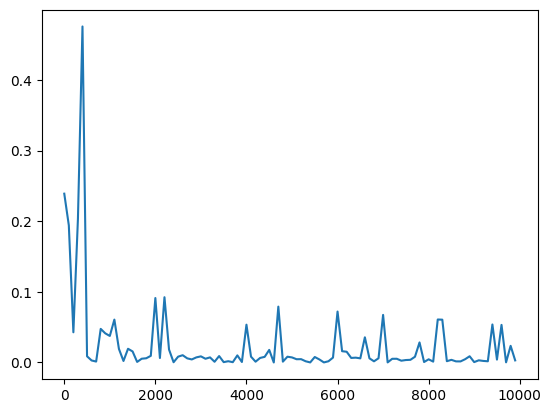

In [125]:
plt.plot(epoch_list,cost_list)

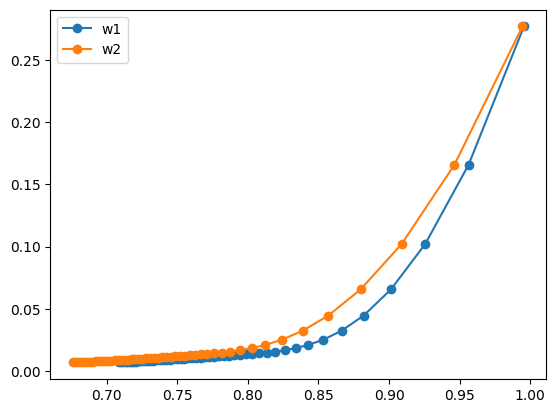

In [184]:
plt.plot(w_list,cost_list,marker='o',label=['w1','w2'])
plt.legend()

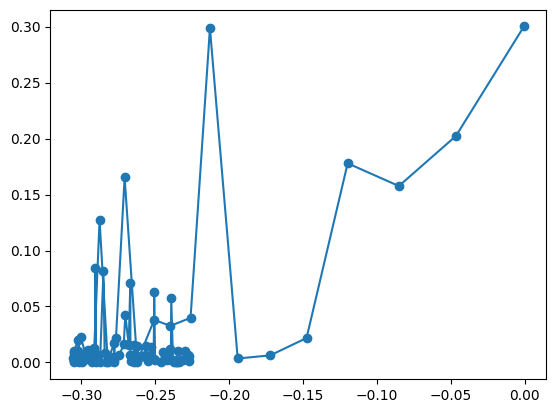

In [157]:
plt.plot(b_list,cost_list,marker='o')

In [170]:
sx.transform([[100,200]])
sy.transform([[100]])
sy.inverse_transform([[100]])

/home/darnesh/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[13532.]])

In [173]:
def predict(area,bedrooms,w,b):
    scaled_x = sx.transform([[area,bedrooms]])[0]
    pred_y = w[0]*scaled_x[0] + w[1]*scaled_x[1] + b
    return sy.inverse_transform([[pred_y]])[0][0]

In [174]:
predict(2600,4,w,b)

/home/darnesh/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.6517010320698

In [175]:
predict(1500,2,w,b)

/home/darnesh/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


47.06362466237119

In [176]:
predict(800,1,w,b)

/home/darnesh/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1.3281435450258603